<a href="https://colab.research.google.com/github/mohammadAliMkh/Tensorflow/blob/main/bitpridict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sktime
!pip install kats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.9 MB 6.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 612 kB 5.7 MB/s 
     |████████████████████████████████| 64 kB 3.1 MB/s 
     |████████████████████████████████| 62.6 MB 142 kB/s 
     |████████████████████████████████| 245 kB 59.3 MB/s 
     |████████████████████████████████| 950 kB 61.6 MB/s 
     |████████████████████████████████| 347 kB 53.8 MB/s 
     |████████████████████████████████| 155 kB 57.0 MB/s 
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
from statsmodels.tsa.arima_model import ARIMA

In [3]:
!wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv"

--2022-12-28 08:44:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2022-12-28 08:44:34 (9.90 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [4]:
btc = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv" , index_col = ["Date"] , parse_dates=["Date"])

In [5]:
btc.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [6]:
btc.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [7]:
import matplotlib.pyplot as plt

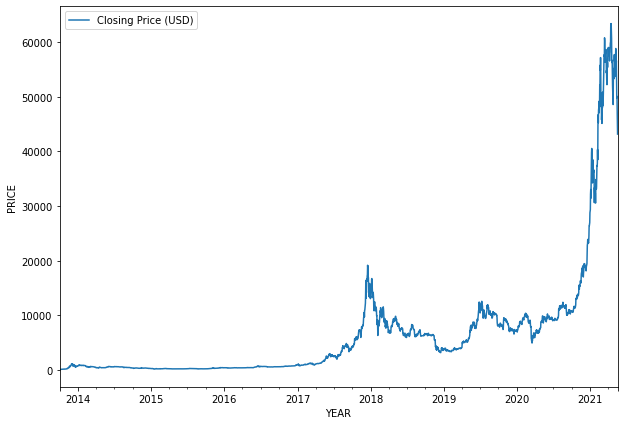

In [8]:
pd.DataFrame(btc["Closing Price (USD)"]).plot(figsize = [10 , 7] , xlabel = "YEAR" , ylabel = "PRICE")

In [9]:
import csv
from datetime import datetime

In [10]:
prices = []
times = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv" , "r") as f:
  csv_reader = csv.reader(f , delimiter = ",")
  next(csv_reader)
  for line in csv_reader:
    times.append(datetime.strptime(line[1] , "%Y-%m-%d"))
    prices.append(float(line[2]))

In [11]:
times[:10] , prices[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0, 0.5, 'PRICE')

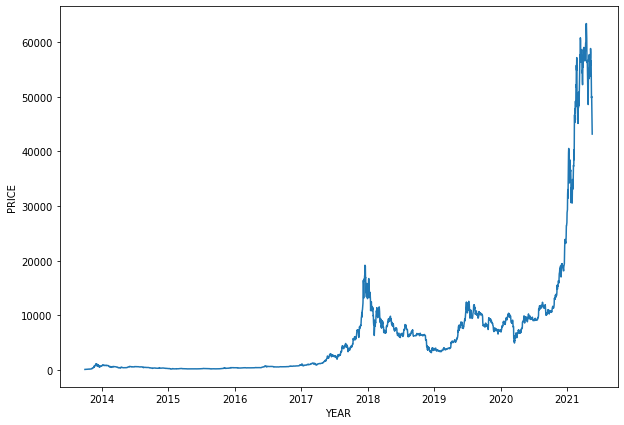

In [12]:
plt.figure(figsize = (10 , 7))
plt.plot(times, prices)
plt.xlabel("YEAR")
plt.ylabel("PRICE")

In [13]:
def plot_btc(times , prices, start=None, end = None , format = "." , label = None):
  plt.plot(times[start:end] , prices[start:end] , marker = format , label = label)
  if label:
    plt.legend()
  plt.xlabel("Year" , fontsize = 14)
  plt.ylabel("Price" , fontsize = 14)
  plt.title("bitcoin prices over times")
  plt.grid(True)

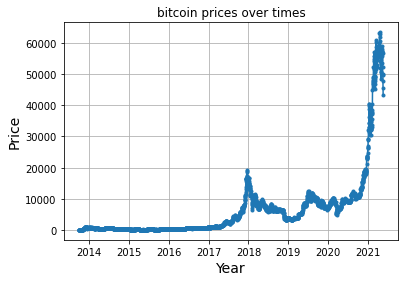

In [14]:

plot_btc(times , prices)

In [15]:
from sklearn.model_selection import train_test_split
import numpy as np
train_size = int(len(times) * 90 / 100)
x_train = np.array(times[:train_size])
y_train = np.array(prices[:train_size])
x_test = np.array(times[train_size:])
y_test = np.array(prices[train_size:])

In [16]:
len(times) - train_size

279

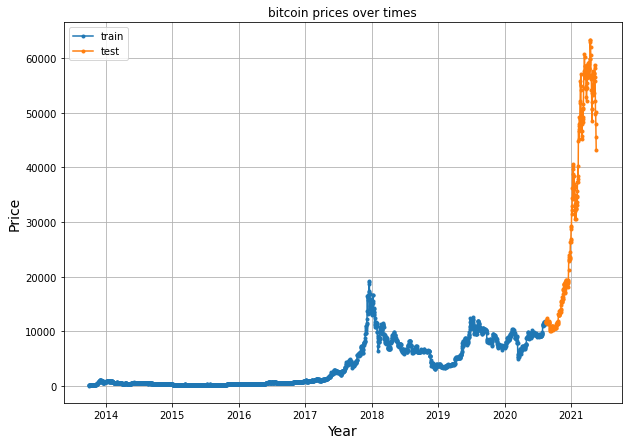

In [17]:
plt.figure(figsize = (10 , 7))
plot_btc(x_train , y_train , label = "train")
plot_btc(x_test , y_test , label = "test")

In [18]:
'''
base model for bitpredict is {y(t) = y(t-1)}
'''

y_hat = y_train[:-1]

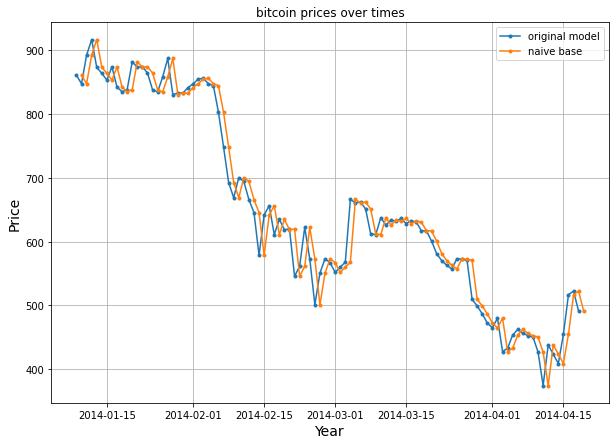

In [19]:
plt.figure(figsize = (10 , 7))
plot_btc(x_train , y_train , start=100 , end = 200 , label = "original model")
plot_btc(x_train[1:] , y_hat , start = 100 , end = 200 , label = "naive base")

In [20]:
!wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"

--2022-12-28 08:44:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-12-28 08:44:36 (98.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [21]:
import numpy as np
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season


def calculate_btc_evaluation_result(y_true , y_pred):
  ''' 
  calculate different evaluation metrics for BTC prices

  y_true: real prices of bitcoin
  predicts: predicted prices of bitcoin

  return: a dictionary of different evaluation metrics [mae(mean average error) , mse(mean square error),
   rmse(root mean square error), mape(mean absolute percentage error), mase(mean absolute scale error)]

  '''

  y_true = tf.cast(y_true , tf.float32)
  y_pred = tf.cast(y_pred , tf.float32)


  mae = tf.keras.metrics.mae(y_true , y_pred)
  mse = tf.keras.metrics.mse(y_true , y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mape(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true , y_pred)

  return {"mae":mae.numpy() , "mse": mse.numpy() , "rmse":rmse.numpy() , "mape":mape.numpy() , "mase":mase.numpy()}

In [22]:
base_model_evaluation = calculate_btc_evaluation_result(y_train[1:] , y_hat)
base_model_evaluation

{'mae': 114.85984,
 'mse': 71173.1,
 'rmse': 266.78287,
 'mape': 2.7602856,
 'mase': 0.9996074}

In [23]:
def naive_moving_smooth(raw_data , window = 3):
  '''
  calculate moving smooth as an other naive prediction in time serires models

  input: real data as csv

  return: a list of predictions
  '''
  X = raw_data

  history = [X[i] for i in range(window)]
  test = [X[i] for i in range(window , len(X))]
  preds = []

  for t in range(len(test)):
    length = len(history)
    pred = np.mean([history[i] for i in range(length - window , length)])
    preds.append(pred)
    obs = test[t]
    history.append(obs)

  return preds



In [24]:
ms_predictions = naive_moving_smooth(y_train)

In [25]:
moving_smooth_evaluation = calculate_btc_evaluation_result(y_train[3:] , ms_predictions)
moving_smooth_evaluation

{'mae': 145.59023,
 'mse': 104136.67,
 'rmse': 322.70215,
 'mape': 3.4541063,
 'mase': 1.2661566}

In [26]:
def naive_ARIMA(raw_data , AR):
  train = raw_data[:AR+2]
  test = raw_data[AR+2:]
  predictions  = []
  history =  [x for x in train]
  for t in range(len(test)):
    model = ARIMA(history , order = (AR , 0 , 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    pred = output[0]
    predictions.append(pred)
    obs = test[t]
    history.append(obs)
  return predictions

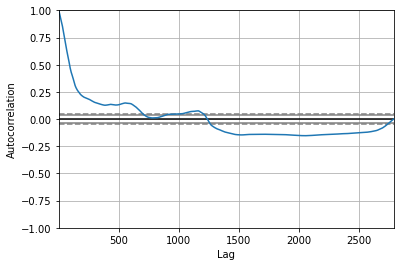

In [27]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(btc["Closing Price (USD)"])

In [28]:
#arima_predictions = naive_ARIMA(y_train , 1)

In [29]:
from sktime.forecasting.naive import NaiveForecaster

In [30]:
forecaster = NaiveForecaster(strategy="last" , sp = 1)

data = btc["Closing Price (USD)"]
history = pd.DataFrame(data).to_numpy()
predictions = []
forecaster.fit(history)
output = forecaster.predict(1)

In [31]:
history

array([[  123.65499   ],
       [  125.455     ],
       [  108.58483   ],
       ...,
       [47885.62525472],
       [45604.61575361],
       [43144.47129086]])

In [32]:
data = btc["Closing Price (USD)"]
raw = data.to_numpy()
x = [x for x in raw[:3]]
x

[123.65499, 125.455, 108.58483]

In [33]:
def naive_sktime(raw_data , strategy = "drift" , sp = 1):
  forcaster = NaiveForecaster(strategy = strategy , sp = sp)
  data = raw_data
  predictions = []
  history = np.array([x for x in data[:3]])
  print(history)
  for t in range(len(data[3:])):
    forcaster.fit(history)
    pred = forcaster.predict(1)
    obs = data[t]
    predictions.append(pred)
    history = np.append(history , obs)
  return predictions

In [34]:
sktime_predictions = naive_sktime(y_train)

[123.65499 125.455   108.58483]


In [35]:
np.squeeze(sktime_predictions[:5]).tolist()

[101.04974999999999, 123.65499, 125.9050025, 105.570798, 117.844605]

In [36]:
len(sktime_predictions) , len(y_train[3:])

(2505, 2505)

In [37]:
sktime_evaluation = calculate_btc_evaluation_result(y_train[3:] , np.squeeze(sktime_predictions).tolist())

In [38]:
sktime_evaluation , moving_smooth_evaluation , base_model_evaluation

({'mae': 239.32962,
  'mse': 266362.6,
  'rmse': 516.1033,
  'mape': 5.7625933,
  'mase': 2.0813813},
 {'mae': 145.59023,
  'mse': 104136.67,
  'rmse': 322.70215,
  'mape': 3.4541063,
  'mase': 1.2661566},
 {'mae': 114.85984,
  'mse': 71173.1,
  'rmse': 266.78287,
  'mape': 2.7602856,
  'mase': 0.9996074})

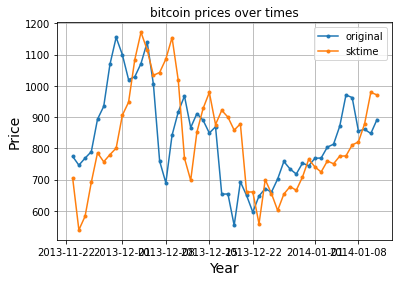

In [39]:
plot_btc(x_train[3:] , y_train[3:] ,start = 50 ,  end = 100, label = "original")
plot_btc(x_train[3:] , np.squeeze(sktime_predictions).tolist()  ,start = 50, end = 100, label = "sktime")

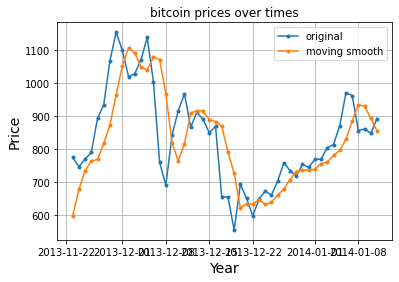

In [40]:
plot_btc(x_train[3:] , y_train[3:] ,start = 50 ,  end = 100, label = "original")
plot_btc(x_train[3:] , ms_predictions ,start = 50 ,  end = 100, label = "moving smooth")

In [41]:
import kats

In [42]:
ts = pd.DataFrame({"time": x_train , "value": y_train})
ts[:3]

,time,value
0,2013-10-01,123.65499
1,2013-10-02,125.45500
2,2013-10-03,108.58483


In [43]:
from kats.consts import TimeSeriesData
kats_data = TimeSeriesData(ts)

In [44]:
from kats.models.prophet import ProphetModel , ProphetParams
params =ProphetParams(seasonality_mode = "multiplicative")

In [45]:
model = ProphetModel(kats_data , params)

In [46]:
model.fit()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [47]:
def naive_kats_prophet(time , value, days = 1, freq = "MS"):
  data = pd.DataFrame({"time":time , "value":value})
  kats_data = TimeSeriesData(data)
  params = ProphetParams(seasonality_mode="multiplicative")
  model = ProphetModel(kats_data , params)
  model.fit()
  predicts = model.predict(days , freq)
  return predicts["fcst"].tolist()

In [48]:
x = naive_kats_prophet(x_train , y_train , days = 279)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


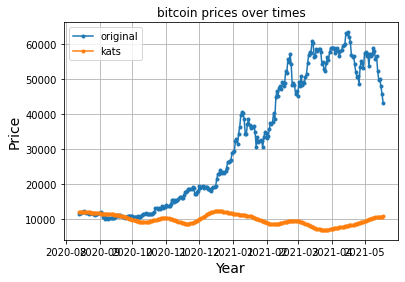

In [49]:
plot_btc(x_test , y_test , label = "original")
plot_btc(x_test , x , label = "kats")

In [50]:
a = y_train
i = 2501
len(a)

2508

In [51]:
windows = []
horizons = []
for i in range(len(a) - 7):
  windows.append(a[i: i +7].tolist())
  horizons.append(a[i+7])

In [52]:
def generate_window_horizon_slices(raw_data , h_size = 1 , w_size = 7):
  """ 
  gererating sliceses depends on horizon and window size


  inputs:
      raw data ---> a list 1 dimension-array
      h_size ----------> determine horizon size, default is 1
      w_size ----------> determine window size, defualt is 7

    output:
      windows ----> a list of windows
      horizons ---> a list of horizons
  """


  windows = []
  horizons = []
  for i in range(len(raw_data) - w_size):
    windows.append(a[i:i+w_size].tolist())
    if h_size == 1:
      horizons.append(a[i+w_size])
    else:
      horizons.append(a[i+w_size:i+w_size+h_size].tolist())
  
  return windows , horizons

In [53]:
windows , horizons = generate_window_horizon_slices(y_train , w_size = 7 , h_size = 1)

In [54]:
import numpy as np
def create_window_horizen_slices(raw_data , window_size = 7 , horizon_size = 1):
  ''' 
    create window and horizon slices accoridng to window size and horizon size in efficient way

  '''

  first_indexes = np.arange(0 , window_size + horizon_size)
  all_indexes = np.arange(window_size + horizon_size , len(raw_data) - window_size - horizon_size + 1)
  slice_index = first_indexes + np.expand_dims(all_indexes , axis = 1)

  windows_with_horizons = raw_data[slice_index]

  windows = windows_with_horizons[: , :-horizon_size]
  horizons = windows_with_horizons[: , -horizon_size:]

  return windows , horizons



In [55]:
windows , horizons = create_window_horizen_slices(y_train , window_size = 7 , horizon_size = 1)

train_value , train_label , test_value , test_label

In [56]:
def make_train_test_splits(windows , horizons , split_size = 0.2):
  '''
  make windows and horizons to train and test splits
  '''

  splits = int(len(windows) * (1-split_size))
  train_values = windows[:splits]
  train_labels = horizons[:splits]
  test_values = windows[splits:]
  test_labels = horizons[splits:]

  return train_values , train_labels , test_values , test_labels

In [57]:
train_values , train_labels , test_values , test_labels = make_train_test_splits(windows , horizons
                                                                                )

In [58]:
len(train_values)  , len(test_values) , len(train_labels) , len(test_labels)

(1994, 499, 1994, 499)

In [59]:
import tensorflow as tf
def save_best_model( model_name , file_path = "/content/model_experiments"):
  '''
  create the best model of our experience to save for further comparision
  '''

  return tf.keras.callbacks.ModelCheckpoint(file_path + "/" + model_name , verbose = 1 , save_best_only = True)

In [60]:
import tensorflow as tf
import numpy as np

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128 , activation = "relu"),
    tf.keras.layers.Dense(1 , activation = "linear")
] , name = "model_1")

In [61]:
model1.compile(optimizer = tf.keras.optimizers.Adam() , loss = "mae" , metrics = ["mae" , "mse"])

In [62]:
history1 = model1.fit(x = train_values , y = train_labels,verbose = 1,  epochs = 100 , validation_data = (test_values , test_labels) , batch_size = 128 , callbacks = [save_best_model(model1.name)])

Epoch 1/100
 1/16 [>.............................] - ETA: 35s - loss: 1027.9841 - mae: 1027.9841 - mse: 3296638.5000
Epoch 1: val_loss improved from inf to 447.57782, saving model to /content/model_experiments/model_1
16/16 [==============================] - 3s 47ms/step - loss: 395.3696 - mae: 395.3696 - mse: 732113.2500 - val_loss: 447.5778 - val_mae: 447.5778 - val_mse: 396840.2188
Epoch 2/100
15/16 [===========================>..] - ETA: 0s - loss: 205.6879 - mae: 205.6879 - mse: 233414.5469
Epoch 2: val_loss did not improve from 447.57782
16/16 [==============================] - 0s 6ms/step - loss: 203.3537 - mae: 203.3537 - mse: 228589.7812 - val_loss: 501.5256 - val_mae: 501.5256 - val_mse: 445085.9688
Epoch 3/100
 1/16 [>.............................] - ETA: 0s - loss: 195.9337 - mae: 195.9337 - mse: 273475.7188
Epoch 3: val_loss improved from 447.57782 to 434.16562, saving model to /content/model_experiments/model_1
16/16 [==============================] - 0s 28ms/step - loss:

In [63]:
model1 = tf.keras.models.load_model("/content/model_experiments/model_1")
model1_evaluation = model1.evaluate(test_values , test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 226.4724 - mae: 226.4724 - mse: 116789.3672


In [64]:
model1_predicts = model1.predict(test_values)

16/16 [==============================] - 0s 2ms/step


In [65]:
model1_predicts[:10].squeeze()

array([4099.904 , 4133.54  , 4730.087 , 5098.4404, 4964.9253, 5031.107 ,
       5058.6377, 5210.407 , 5269.538 , 5203.9727], dtype=float32)

In [66]:
model1_evaluation = calculate_btc_evaluation_result( test_labels.squeeze(), model1_predicts.squeeze())

In [67]:
model1_evaluation

{'mae': 226.4724,
 'mse': 116789.37,
 'rmse': 341.7446,
 'mape': 2.6501749,
 'mase': 1.0167487}

In [68]:
base_model_evaluation

{'mae': 114.85984,
 'mse': 71173.1,
 'rmse': 266.78287,
 'mape': 2.7602856,
 'mase': 0.9996074}

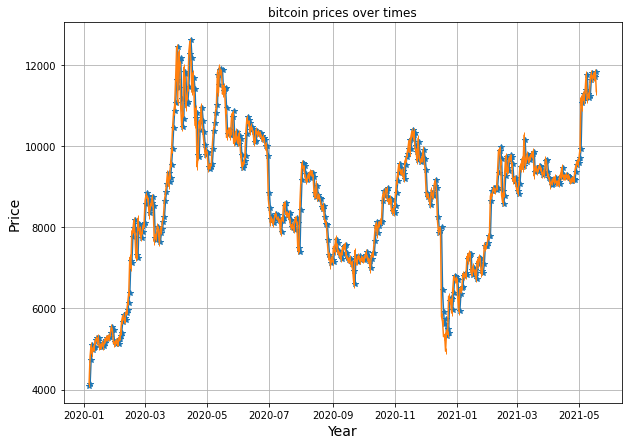

In [69]:
plt.figure(figsize = (10 , 7))
plot_btc(times[-499:] , model1_predicts , format = "*")
plot_btc(times[-499:] , test_labels , format = "|" )

In [70]:
windows_30 , horizons_1 = create_window_horizen_slices(y_train , window_size = 30 , horizon_size = 1)

In [71]:
train_values , train_labels , test_values , test_labels = make_train_test_splits(windows_30 , horizons_1 , split_size = 0.2)

In [72]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128 , activation = "relu"),
    tf.keras.layers.Dense(1 , activation = "linear")
] , name = "model_2")

In [73]:
model2.compile(optimizer = tf.keras.optimizers.Adam() , loss = "mae" , metrics = ["mae" , "mse"])

In [74]:
history2 = model2.fit(x = train_values , y = train_labels,verbose = 1,  epochs = 100 , validation_data = (test_values , test_labels) , batch_size = 128 , callbacks = [save_best_model(model2.name)])

Epoch 1/100
 1/16 [>.............................] - ETA: 5s - loss: 2374.7114 - mae: 2374.7114 - mse: 15791596.0000
Epoch 1: val_loss improved from inf to 1554.89514, saving model to /content/model_experiments/model_2
16/16 [==============================] - 1s 36ms/step - loss: 816.6035 - mae: 816.6035 - mse: 3310024.2500 - val_loss: 1554.8951 - val_mae: 1554.8951 - val_mse: 3070780.0000
Epoch 2/100
 1/16 [>.............................] - ETA: 0s - loss: 660.2257 - mae: 660.2257 - mse: 1930976.7500
Epoch 2: val_loss improved from 1554.89514 to 607.51111, saving model to /content/model_experiments/model_2
16/16 [==============================] - 0s 30ms/step - loss: 367.1213 - mae: 367.1213 - mse: 715804.0000 - val_loss: 607.5111 - val_mae: 607.5111 - val_mse: 658903.3125
Epoch 3/100
 1/16 [>.............................] - ETA: 0s - loss: 230.2716 - mae: 230.2716 - mse: 238735.5625
Epoch 3: val_loss improved from 607.51111 to 549.52808, saving model to /content/model_experiments/mod

In [75]:
model2 = tf.keras.models.load_model("/content/model_experiments/model_2")
model2_predicts = model2.predict(test_values)

16/16 [==============================] - 0s 2ms/step


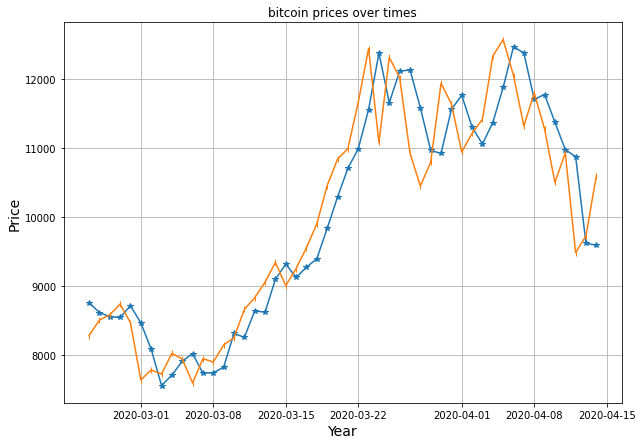

In [76]:
plt.figure(figsize = (10 , 7))
plot_btc(times[-499:] , model2_predicts , format = "*" , start = 50 , end = 100)
plot_btc(times[-499:] , test_labels , format = "|" , start = 50 , end = 100)

In [77]:
model2_evaluation = calculate_btc_evaluation_result(test_labels.squeeze() , model2_predicts.squeeze())
model2_evaluation

{'mae': 251.57043,
 'mse': 132000.97,
 'rmse': 363.31937,
 'mape': 2.910295,
 'mase': 1.1269681}

In [78]:
windows_30 , horizon_7 = create_window_horizen_slices(y_train, window_size = 30 , horizon_size = 7)

In [79]:
train_values , train_labels , test_values , test_labels = make_train_test_splits(windows_30 , horizon_7)

In [80]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128 , activation = "relu") , 
    tf.keras.layers.Dense(7 , activation = "linear")
] , name = "model_3")

In [81]:
model3.compile(loss = "mae" , optimizer = tf.keras.optimizers.Adam() , metrics = ["mse" , "mae"])

In [82]:
history3 = model3.fit(train_values , train_labels , epochs = 100 , validation_data = (test_values , test_labels) , batch_size = 128 , callbacks = [save_best_model(model3.name)])

Epoch 1/100
 1/16 [>.............................] - ETA: 4s - loss: 1505.5684 - mse: 9520590.0000 - mae: 1505.5684
Epoch 1: val_loss improved from inf to 1416.08911, saving model to /content/model_experiments/model_3
16/16 [==============================] - 1s 36ms/step - loss: 852.2190 - mse: 3814018.0000 - mae: 852.2190 - val_loss: 1416.0891 - val_mse: 3223541.2500 - val_mae: 1416.0891
Epoch 2/100
 1/16 [>.............................] - ETA: 0s - loss: 439.0734 - mse: 866945.7500 - mae: 439.0734
Epoch 2: val_loss improved from 1416.08911 to 1080.93896, saving model to /content/model_experiments/model_3
16/16 [==============================] - 0s 28ms/step - loss: 437.0027 - mse: 1038137.8750 - mae: 437.0027 - val_loss: 1080.9390 - val_mse: 1929229.7500 - val_mae: 1080.9390
Epoch 3/100
 1/16 [>.............................] - ETA: 0s - loss: 505.4872 - mse: 1365662.5000 - mae: 505.4872
Epoch 3: val_loss improved from 1080.93896 to 833.42249, saving model to /content/model_experiment

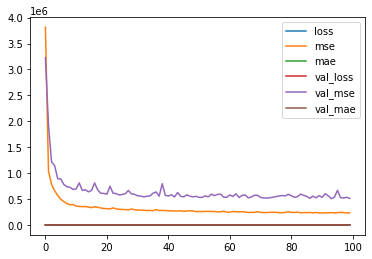

In [83]:
pd.DataFrame(history3.history).plot()

In [84]:
model3 = tf.keras.models.load_model("/content/model_experiments/model_3")
model3_predicts = model3.predict(test_values)

16/16 [==============================] - 0s 1ms/step


In [85]:
model3_predicts.shape[1] , model2_predicts.shape

(7, (490, 1))

In [86]:
model3_evaluation = calculate_btc_evaluation_result(test_labels , model3_predicts)

In [87]:
def make_evaluation_correct_form(evaluation_dict):
  mae = evaluation_dict["mae"].mean()
  mse = evaluation_dict["mse"].mean()
  rmse = evaluation_dict["rmse"].mean()
  mape = evaluation_dict["mape"].mean()
  mase = evaluation_dict["mase"].mean()

  return {"mae":mae , "mse": mse , "rmse":rmse , "mape":mape , "mase":mase}


In [88]:
model3_evaluation = make_evaluation_correct_form(model3_evaluation)
model3_evaluation

{'mae': 492.62723,
 'mse': 507192.22,
 'rmse': 565.71246,
 'mape': 5.7374983,
 'mase': 2.2078617}

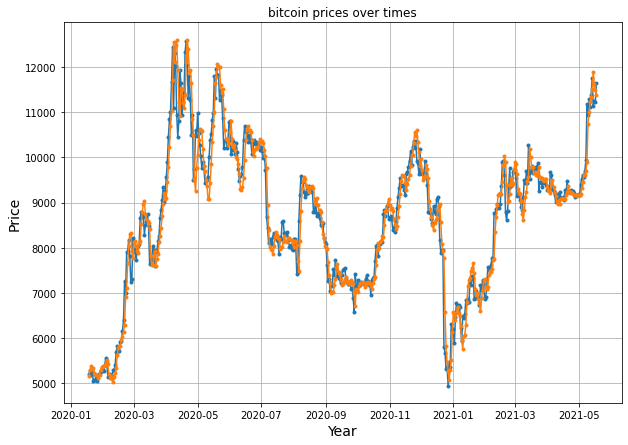

In [89]:
plt.figure(figsize = [10 , 7])
plot_btc(times[-487:] , test_labels[:  ,0])
plot_btc(times[-487:] , model3_predicts.mean(axis =1))

In [90]:
models_results = pd.DataFrame({"naive": base_model_evaluation , "model1": model1_evaluation , "model2":model2_evaluation , "model3": model3_evaluation})

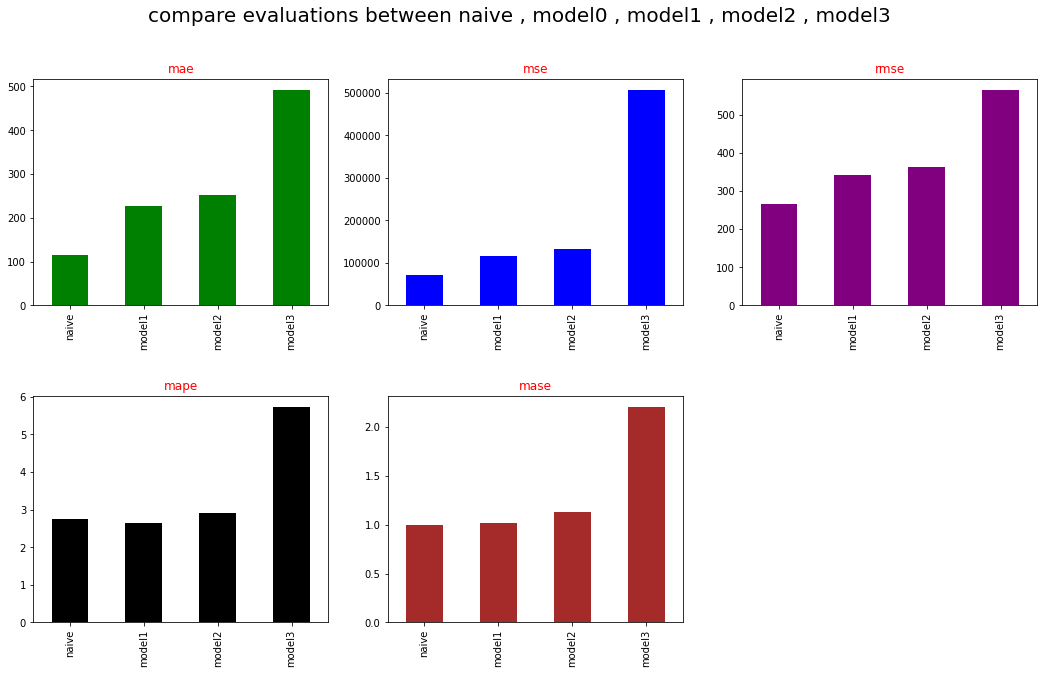

In [91]:
plt.figure(figsize = [18 , 10])
plt.subplots_adjust(hspace = 0.4)
plt.subplot(2 , 3 , 1)
plt.title("mae" , fontsize = 12 , c = "red")
models_results.transpose()["mae"].plot.bar(color = "green")
plt.subplot(2 , 3 , 2)
plt.title("mse" , fontsize = 12 , c = "red")
models_results.transpose()["mse"].plot.bar(color = "blue")
plt.subplot(2 , 3 , 3)
plt.title("rmse" , fontsize = 12 , c = "red")
models_results.transpose()["rmse"].plot.bar(color = "purple")
plt.subplot(2 , 3 , 4)
plt.title("mape" , fontsize = 12 , c = "red")
models_results.transpose()["mape"].plot.bar(color = "black")
plt.subplot(2 , 3 , 5)
plt.title("mase" , fontsize = 12 , c = "red")
models_results.transpose()["mase"].plot.bar(color = "brown")
plt.suptitle("compare evaluations between naive , model0 , model1 , model2 , model3", fontsize = 20)
plt.show()

In [92]:
windows , horizons = create_window_horizen_slices(np.array(prices) , window_size = 7 , horizon_size = 1)

In [93]:
train_values , train_labels , test_values , test_labels = make_train_test_splits(windows , horizons)

In [94]:
len(train_values) , len(train_labels), len(test_values) , len(test_labels)

(2217, 2217, 555, 555)

In [95]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x , axis = 1)),
    tf.keras.layers.Conv1D(filters = 128 , kernel_size = 5 , strides = 1 , padding = "causal" , activation = "relu"),
    tf.keras.layers.Dense(1 , activation = "linear")
] , name = "model_4")

In [96]:
model4.compile(loss = "mae" , optimizer = tf.keras.optimizers.Adam() , metrics = ["mae" , "mse"])

In [97]:
history4 = model4.fit(train_values , train_labels , epochs = 100 , verbose = 0 , batch_size = 128 , validation_data = (test_values , test_labels) , callbacks = [save_best_model(model4.name)])


Epoch 1: val_loss improved from inf to 2268.13965, saving model to /content/model_experiments/model_4



Epoch 2: val_loss improved from 2268.13965 to 1558.70764, saving model to /content/model_experiments/model_4



Epoch 3: val_loss improved from 1558.70764 to 1129.14368, saving model to /content/model_experiments/model_4



Epoch 4: val_loss improved from 1129.14368 to 1028.41785, saving model to /content/model_experiments/model_4



Epoch 5: val_loss improved from 1028.41785 to 996.50269, saving model to /content/model_experiments/model_4



Epoch 6: val_loss improved from 996.50269 to 982.98828, saving model to /content/model_experiments/model_4



Epoch 7: val_loss improved from 982.98828 to 957.19946, saving model to /content/model_experiments/model_4



Epoch 8: val_loss did not improve from 957.19946

Epoch 9: val_loss improved from 957.19946 to 924.69031, saving model to /content/model_experiments/model_4



Epoch 10: val_loss did not improve from 924.69031

Epoch 11: val_loss improved from 924.69031 to 920.76331, saving model to /content/model_experiments/model_4



Epoch 12: val_loss improved from 920.76331 to 880.08331, saving model to /content/model_experiments/model_4



Epoch 13: val_loss did not improve from 880.08331

Epoch 14: val_loss improved from 880.08331 to 844.56787, saving model to /content/model_experiments/model_4



Epoch 15: val_loss did not improve from 844.56787

Epoch 16: val_loss improved from 844.56787 to 829.90015, saving model to /content/model_experiments/model_4



Epoch 17: val_loss improved from 829.90015 to 799.16577, saving model to /content/model_experiments/model_4



Epoch 18: val_loss improved from 799.16577 to 789.55225, saving model to /content/model_experiments/model_4



Epoch 19: val_loss improved from 789.55225 to 777.63171, saving model to /content/model_experiments/model_4



Epoch 20: val_loss did not improve from 777.63171

Epoch 21: val_loss improved from 777.63171 to 764.94086, saving model to /content/model_experiments/model_4



Epoch 22: val_loss improved from 764.94086 to 747.45569, saving model to /content/model_experiments/model_4



Epoch 23: val_loss improved from 747.45569 to 727.99518, saving model to /content/model_experiments/model_4



Epoch 24: val_loss improved from 727.99518 to 716.92999, saving model to /content/model_experiments/model_4



Epoch 25: val_loss did not improve from 716.92999

Epoch 26: val_loss improved from 716.92999 to 698.61554, saving model to /content/model_experiments/model_4



Epoch 27: val_loss did not improve from 698.61554

Epoch 28: val_loss improved from 698.61554 to 683.96143, saving model to /content/model_experiments/model_4



Epoch 29: val_loss did not improve from 683.96143

Epoch 30: val_loss did not improve from 683.96143

Epoch 31: val_loss did not improve from 683.96143

Epoch 32: val_loss improved from 683.96143 to 658.47351, saving model to /content/model_experiments/model_4



Epoch 33: val_loss did not improve from 658.47351

Epoch 34: val_loss did not improve from 658.47351

Epoch 35: val_loss improved from 658.47351 to 645.31006, saving model to /content/model_experiments/model_4



Epoch 36: val_loss did not improve from 645.31006

Epoch 37: val_loss improved from 645.31006 to 638.18848, saving model to /content/model_experiments/model_4



Epoch 38: val_loss did not improve from 638.18848

Epoch 39: val_loss did not improve from 638.18848

Epoch 40: val_loss did not improve from 638.18848

Epoch 41: val_loss did not improve from 638.18848

Epoch 42: val_loss did not improve from 638.18848

Epoch 43: val_loss did not improve from 638.18848

Epoch 44: val_loss did not improve from 638.18848

Epoch 45: val_loss improved from 638.18848 to 631.40497, saving model to /content/model_experiments/model_4



Epoch 46: val_loss improved from 631.40497 to 611.10760, saving model to /content/model_experiments/model_4



Epoch 47: val_loss improved from 611.10760 to 608.68494, saving model to /content/model_experiments/model_4



Epoch 48: val_loss did not improve from 608.68494

Epoch 49: val_loss improved from 608.68494 to 605.01306, saving model to /content/model_experiments/model_4



Epoch 50: val_loss did not improve from 605.01306

Epoch 51: val_loss did not improve from 605.01306

Epoch 52: val_loss did not improve from 605.01306

Epoch 53: val_loss did not improve from 605.01306

Epoch 54: val_loss improved from 605.01306 to 602.93231, saving model to /content/model_experiments/model_4



Epoch 55: val_loss did not improve from 602.93231

Epoch 56: val_loss did not improve from 602.93231

Epoch 57: val_loss did not improve from 602.93231

Epoch 58: val_loss did not improve from 602.93231

Epoch 59: val_loss improved from 602.93231 to 601.43402, saving model to /content/model_experiments/model_4



Epoch 60: val_loss improved from 601.43402 to 600.85571, saving model to /content/model_experiments/model_4



Epoch 61: val_loss did not improve from 600.85571

Epoch 62: val_loss improved from 600.85571 to 600.46613, saving model to /content/model_experiments/model_4



Epoch 63: val_loss improved from 600.46613 to 586.46521, saving model to /content/model_experiments/model_4



Epoch 64: val_loss improved from 586.46521 to 585.25708, saving model to /content/model_experiments/model_4



Epoch 65: val_loss did not improve from 585.25708

Epoch 66: val_loss did not improve from 585.25708

Epoch 67: val_loss did not improve from 585.25708

Epoch 68: val_loss improved from 585.25708 to 583.86304, saving model to /content/model_experiments/model_4



Epoch 69: val_loss did not improve from 583.86304

Epoch 70: val_loss did not improve from 583.86304

Epoch 71: val_loss did not improve from 583.86304

Epoch 72: val_loss did not improve from 583.86304

Epoch 73: val_loss did not improve from 583.86304

Epoch 74: val_loss improved from 583.86304 to 579.15399, saving model to /content/model_experiments/model_4



Epoch 75: val_loss did not improve from 579.15399

Epoch 76: val_loss did not improve from 579.15399

Epoch 77: val_loss did not improve from 579.15399

Epoch 78: val_loss did not improve from 579.15399

Epoch 79: val_loss did not improve from 579.15399

Epoch 80: val_loss did not improve from 579.15399

Epoch 81: val_loss improved from 579.15399 to 574.47217, saving model to /content/model_experiments/model_4



Epoch 82: val_loss did not improve from 574.47217

Epoch 83: val_loss improved from 574.47217 to 573.14642, saving model to /content/model_experiments/model_4



Epoch 84: val_loss did not improve from 573.14642

Epoch 85: val_loss did not improve from 573.14642

Epoch 86: val_loss did not improve from 573.14642

Epoch 87: val_loss did not improve from 573.14642

Epoch 88: val_loss did not improve from 573.14642

Epoch 89: val_loss did not improve from 573.14642

Epoch 90: val_loss improved from 573.14642 to 570.63910, saving model to /content/model_experiments/model_4



Epoch 91: val_loss did not improve from 570.63910

Epoch 92: val_loss did not improve from 570.63910

Epoch 93: val_loss did not improve from 570.63910

Epoch 94: val_loss did not improve from 570.63910

Epoch 95: val_loss improved from 570.63910 to 569.50171, saving model to /content/model_experiments/model_4



Epoch 96: val_loss did not improve from 569.50171

Epoch 97: val_loss did not improve from 569.50171

Epoch 98: val_loss did not improve from 569.50171

Epoch 99: val_loss did not improve from 569.50171

Epoch 100: val_loss did not improve from 569.50171


In [98]:
model4 = tf.keras.models.load_model("/content/model_experiments/model_4")
model4.evaluate(test_values , test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 569.5016 - mae: 569.5016 - mse: 1173204.3750


[569.5016479492188, 569.5016479492188, 1173204.375]

In [99]:
model4_predicts = model4.predict(test_values)
model4_predicts[:5]

18/18 [==============================] - 0s 2ms/step


array([[[8789.507]],

       [[8994.158]],

       [[8766.212]],

       [[8751.846]],

       [[8731.622]]], dtype=float32)

In [100]:
model4_evaluation = calculate_btc_evaluation_result(np.squeeze(test_labels) , np.squeeze(model4_predicts))
model4_evaluation

{'mae': 569.50165,
 'mse': 1173204.5,
 'rmse': 1083.1456,
 'mape': 2.5452938,
 'mase': 0.99954987}

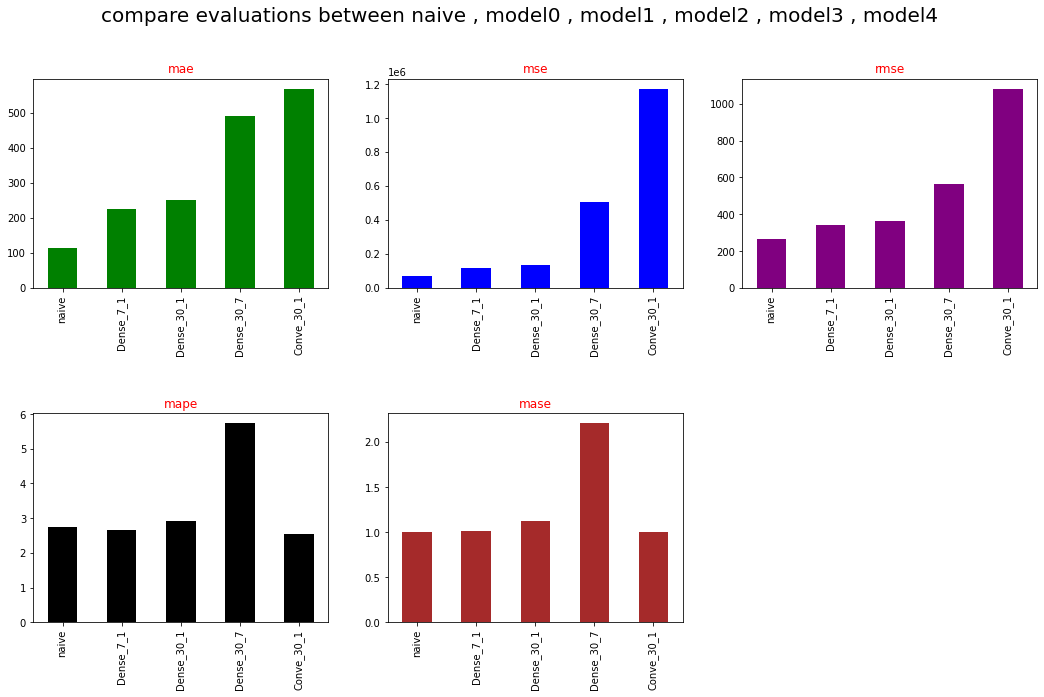

In [101]:
models_results = pd.DataFrame({"naive": base_model_evaluation ,
                               "Dense_7_1": model1_evaluation ,
                               "Dense_30_1":model2_evaluation ,
                               "Dense_30_7": model3_evaluation ,
                               "Conve_30_1": model4_evaluation})

plt.figure(figsize = [18 , 10])
plt.subplots_adjust(hspace = 0.6)
plt.subplot(2 , 3 , 1)
plt.title("mae" , fontsize = 12 , c = "red")
models_results.transpose()["mae"].plot.bar(color = "green")
plt.subplot(2 , 3 , 2)
plt.title("mse" , fontsize = 12 , c = "red")
models_results.transpose()["mse"].plot.bar(color = "blue")
plt.subplot(2 , 3 , 3)
plt.title("rmse" , fontsize = 12 , c = "red")
models_results.transpose()["rmse"].plot.bar(color = "purple")
plt.subplot(2 , 3 , 4)
plt.title("mape" , fontsize = 12 , c = "red")
models_results.transpose()["mape"].plot.bar(color = "black")
plt.subplot(2 , 3 , 5)
plt.title("mase" , fontsize = 12 , c = "red")
models_results.transpose()["mase"].plot.bar(color = "brown")
plt.suptitle("compare evaluations between naive , model0 , model1 , model2 , model3 , model4", fontsize = 20)
plt.show()

In [102]:
import tensorflow as tf
model5 = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x , axis = 1)),
    tf.keras.layers.LSTM(128 , activation = "relu" , return_sequences = True , recurrent_activation="sigmoid"),
    tf.keras.layers.LSTM(64 , activation = "relu"),
    tf.keras.layers.Dense(32 , activation = "relu"),
    tf.keras.layers.Dense(1 , activation = "linear")
] , name = "model_5")

In [103]:
model5.compile(loss = "mae"  , optimizer = tf.keras.optimizers.Adam() , metrics = ["mae" , "mse"])

In [104]:
history5 = model5.fit(train_values , train_labels , epochs = 100 , verbose = 0 , batch_size = 128 , validation_data = (test_values , test_labels) , callbacks = [save_best_model(model5.name)])


Epoch 1: val_loss improved from inf to 16125.22852, saving model to /content/model_experiments/model_5

Epoch 2: val_loss improved from 16125.22852 to 4643.60449, saving model to /content/model_experiments/model_5

Epoch 3: val_loss improved from 4643.60449 to 1498.88733, saving model to /content/model_experiments/model_5

Epoch 4: val_loss improved from 1498.88733 to 1054.26904, saving model to /content/model_experiments/model_5

Epoch 5: val_loss did not improve from 1054.26904

Epoch 6: val_loss did not improve from 1054.26904

Epoch 7: val_loss did not improve from 1054.26904

Epoch 8: val_loss improved from 1054.26904 to 1005.50720, saving model to /content/model_experiments/model_5

Epoch 9: val_loss improved from 1005.50720 to 996.76129, saving model to /content/model_experiments/model_5

Epoch 10: val_loss did not improve from 996.76129

Epoch 11: val_loss improved from 996.76129 to 973.68500, saving model to /content/model_experiments/model_5

Epoch 12: val_loss did not impro

In [105]:
model5 = tf.keras.models.load_model("/content/model_experiments/model_5")
model5.evaluate(test_values , test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 566.6923 - mae: 566.6923 - mse: 1166851.1250


[566.6922607421875, 566.6922607421875, 1166851.125]

In [106]:
model5_predicts = model5.predict(test_values)

18/18 [==============================] - 0s 3ms/step


In [107]:
model5_evaluation = calculate_btc_evaluation_result( np.squeeze(test_labels), np.squeeze(model5_predicts))

In [108]:
model5_evaluation

{'mae': 566.69226,
 'mse': 1166851.0,
 'rmse': 1080.2087,
 'mape': 2.5358384,
 'mase': 0.994619}

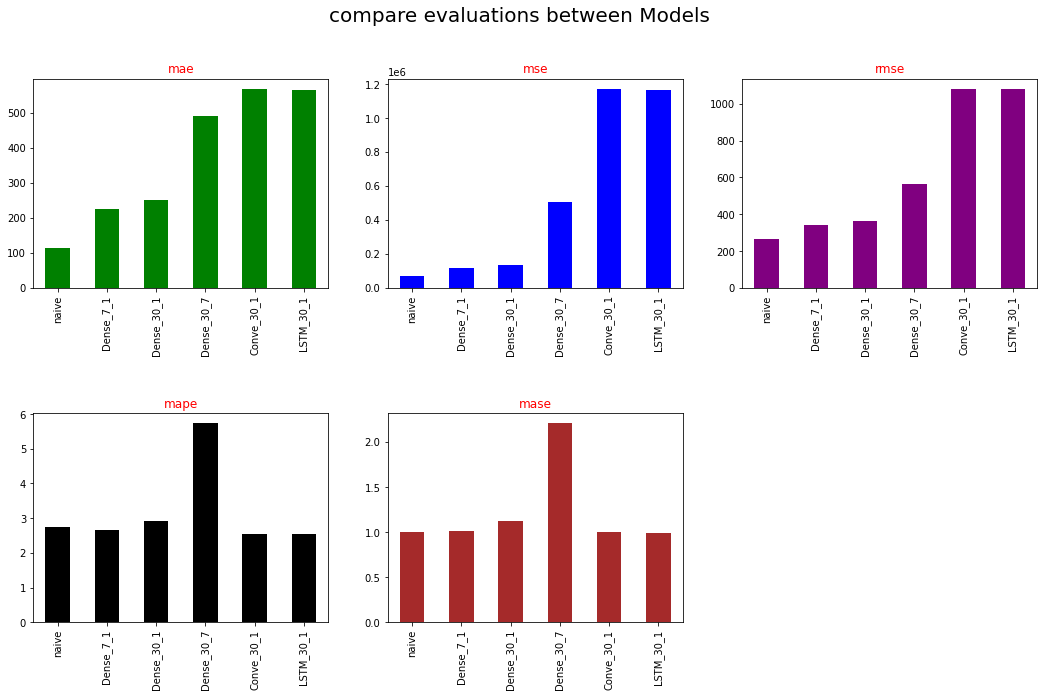

In [109]:
models_results = pd.DataFrame({"naive": base_model_evaluation ,
                               "Dense_7_1": model1_evaluation ,
                               "Dense_30_1":model2_evaluation ,
                               "Dense_30_7": model3_evaluation ,
                               "Conve_30_1": model4_evaluation,
                               "LSTM_30_1":model5_evaluation})

plt.figure(figsize = [18 , 10])
plt.subplots_adjust(hspace = 0.6)
plt.subplot(2 , 3 , 1)
plt.title("mae" , fontsize = 12 , c = "red")
models_results.transpose()["mae"].plot.bar(color = "green")
plt.subplot(2 , 3 , 2)
plt.title("mse" , fontsize = 12 , c = "red")
models_results.transpose()["mse"].plot.bar(color = "blue")
plt.subplot(2 , 3 , 3)
plt.title("rmse" , fontsize = 12 , c = "red")
models_results.transpose()["rmse"].plot.bar(color = "purple")
plt.subplot(2 , 3 , 4)
plt.title("mape" , fontsize = 12 , c = "red")
models_results.transpose()["mape"].plot.bar(color = "black")
plt.subplot(2 , 3 , 5)
plt.title("mase" , fontsize = 12 , c = "red")
models_results.transpose()["mase"].plot.bar(color = "brown")
plt.suptitle("compare evaluations between Models", fontsize = 20)
plt.show()

In [110]:
btc

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [111]:
btc_halving_reward_first = 25
btc_halving_datetime_first = np.datetime64("2012-11-28")
btc_halving_reward_second = 12.5
btc_halving_datetime_second = np.datetime64("2016-06-09")
btc_halving_reward_third = 6.25
btc_halving_datetime_third = np.datetime64("2020-05-11")

In [112]:
ts = pd.DataFrame({"time": x_train , "value": y_train})
reward = np.zeros(shape = 2508 , dtype = np.float64 , )

In [113]:
ts["reward"] = reward
ts

,time,value,reward
0,2013-10-01,123.654990,0.0
1,2013-10-02,125.455000,0.0
2,2013-10-03,108.584830,0.0
3,2013-10-04,118.674660,0.0
4,2013-10-05,121.338660,0.0
...,...,...,...
2503,2020-08-08,11639.935410,0.0
2504,2020-08-09,11744.912076,0.0
2505,2020-08-10,11673.123238,0.0
2506,2020-08-11,11832.227308,0.0


In [114]:
ts["reward"][ts["time"] < btc_halving_datetime_second] = btc_halving_reward_first
ts["reward"][ts["time"] >= btc_halving_datetime_second] = btc_halving_reward_second
ts["reward"][ts["time"] >= btc_halving_datetime_third] = btc_halving_reward_third
ts

<ipython-input-114-52d812fca501>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts["reward"][ts["time"] < btc_halving_datetime_second] = btc_halving_reward_first
<ipython-input-114-52d812fca501>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts["reward"][ts["time"] >= btc_halving_datetime_second] = btc_halving_reward_second
<ipython-input-114-52d812fca501>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts["reward"][ts["time"] >= 

,time,value,reward
0,2013-10-01,123.654990,25.00
1,2013-10-02,125.455000,25.00
2,2013-10-03,108.584830,25.00
3,2013-10-04,118.674660,25.00
4,2013-10-05,121.338660,25.00
...,...,...,...
2503,2020-08-08,11639.935410,6.25
2504,2020-08-09,11744.912076,6.25
2505,2020-08-10,11673.123238,6.25
2506,2020-08-11,11832.227308,6.25


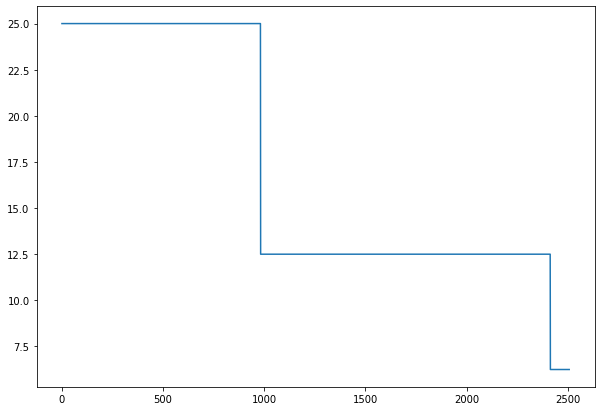

In [115]:
plt.figure(figsize = (10 , 7))
plt.plot(ts["reward"])

In [116]:
columns = ["price1" , "price2" , "price3" , "price4" , "price5" , "price6" , "price7"]
ts[columns] = 0
ts

,time,value,reward,price1,price2,price3,price4,price5,price6,price7
0,2013-10-01,123.654990,25.00,0,0,0,0,0,0,0
1,2013-10-02,125.455000,25.00,0,0,0,0,0,0,0
2,2013-10-03,108.584830,25.00,0,0,0,0,0,0,0
3,2013-10-04,118.674660,25.00,0,0,0,0,0,0,0
4,2013-10-05,121.338660,25.00,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2503,2020-08-08,11639.935410,6.25,0,0,0,0,0,0,0
2504,2020-08-09,11744.912076,6.25,0,0,0,0,0,0,0
2505,2020-08-10,11673.123238,6.25,0,0,0,0,0,0,0
2506,2020-08-11,11832.227308,6.25,0,0,0,0,0,0,0


In [117]:
ts["price1"] = ts["value"].shift(periods = 1)
ts["price2"] = ts["value"].shift(periods = 2)
ts["price3"] = ts["value"].shift(periods = 3)
ts["price4"] = ts["value"].shift(periods = 4)
ts["price5"] = ts["value"].shift(periods = 5)
ts["price6"] = ts["value"].shift(periods = 6)
ts["price7"] = ts["value"].shift(periods = 7)
ts.head(10)
ts = ts[7:]

In [118]:
ts = ts.reset_index()

In [119]:
ts.drop("index" , axis = 1 , inplace = True)

In [120]:
ts

,time,value,reward,price1,price2,price3,price4,price5,price6,price7
0,2013-10-08,123.033000,25.00,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000,123.654990
1,2013-10-09,124.049000,25.00,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000
2,2013-10-10,125.961160,25.00,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830
3,2013-10-11,125.279660,25.00,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660
4,2013-10-12,125.927500,25.00,125.279660,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660
...,...,...,...,...,...,...,...,...,...,...
2496,2020-08-08,11639.935410,6.25,11796.817365,11653.407586,11228.026324,11261.806332,11139.098380,11766.748297,11373.317257
2497,2020-08-09,11744.912076,6.25,11639.935410,11796.817365,11653.407586,11228.026324,11261.806332,11139.098380,11766.748297
2498,2020-08-10,11673.123238,6.25,11744.912076,11639.935410,11796.817365,11653.407586,11228.026324,11261.806332,11139.098380
2499,2020-08-11,11832.227308,6.25,11673.123238,11744.912076,11639.935410,11796.817365,11653.407586,11228.026324,11261.806332


In [121]:
ts[["price7" , "price6" , "price5" , "price4" , "price3" , "price2" , "price1" , "reward"]]

,price7,price6,price5,price4,price3,price2,price1,reward
0,123.654990,125.455000,108.584830,118.674660,121.338660,120.655330,121.795000,25.00
1,125.455000,108.584830,118.674660,121.338660,120.655330,121.795000,123.033000,25.00
2,108.584830,118.674660,121.338660,120.655330,121.795000,123.033000,124.049000,25.00
3,118.674660,121.338660,120.655330,121.795000,123.033000,124.049000,125.961160,25.00
4,121.338660,120.655330,121.795000,123.033000,124.049000,125.961160,125.279660,25.00
...,...,...,...,...,...,...,...,...
2496,11373.317257,11766.748297,11139.098380,11261.806332,11228.026324,11653.407586,11796.817365,6.25
2497,11766.748297,11139.098380,11261.806332,11228.026324,11653.407586,11796.817365,11639.935410,6.25
2498,11139.098380,11261.806332,11228.026324,11653.407586,11796.817365,11639.935410,11744.912076,6.25
2499,11261.806332,11228.026324,11653.407586,11796.817365,11639.935410,11744.912076,11673.123238,6.25


In [122]:
windows = []
for i in range(len(ts)):
  window = ts[ts.index == i][["price7" , "price6" , "price5" , "price4" , "price3" , "price2" , "price1" , "reward"]].to_numpy()
  windows.append(window)

In [123]:
horizons = ts["value"].to_numpy()

In [124]:
windows = np.squeeze(windows[:])

In [125]:
windows[:2]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ,  25.     ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ,  25.     ]])

In [126]:
len(windows)

2501

In [127]:
train_values = windows[:2001]
test_values = windows[2001:]
train_labels = horizons[:2001]
test_labels = horizons[2001:]
len(train_values) , len(train_labels) , len(test_values) , len(test_labels)

(2001, 2001, 500, 500)

In [128]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(128 , activation = "relu"),
    tf.keras.layers.Dense(1 , activation = "linear")
] , name = "model_6")

In [129]:
model6.compile(loss = "mae" , optimizer = tf.keras.optimizers.Adam() , metrics = ["mae" , "mse"])

In [130]:
history6 = model6.fit(train_values , train_labels , epochs = 100, verbose = 0 , batch_size = 128 , validation_data = (test_values , test_labels) , callbacks = [save_best_model(model6.name)])


Epoch 1: val_loss improved from inf to 482.15198, saving model to /content/model_experiments/model_6

Epoch 2: val_loss did not improve from 482.15198

Epoch 3: val_loss did not improve from 482.15198

Epoch 4: val_loss improved from 482.15198 to 424.72897, saving model to /content/model_experiments/model_6

Epoch 5: val_loss improved from 424.72897 to 382.94067, saving model to /content/model_experiments/model_6

Epoch 6: val_loss did not improve from 382.94067

Epoch 7: val_loss improved from 382.94067 to 376.73425, saving model to /content/model_experiments/model_6

Epoch 8: val_loss improved from 376.73425 to 371.25275, saving model to /content/model_experiments/model_6

Epoch 9: val_loss improved from 371.25275 to 359.38922, saving model to /content/model_experiments/model_6

Epoch 10: val_loss did not improve from 359.38922

Epoch 11: val_loss improved from 359.38922 to 341.71655, saving model to /content/model_experiments/model_6

Epoch 12: val_loss did not improve from 341.716

In [131]:
model6 = tf.keras.models.load_model("/content/model_experiments/model_6")
model6.evaluate(test_values , test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 223.2443 - mae: 223.2443 - mse: 113927.2109


[223.2443084716797, 223.2443084716797, 113927.2109375]

In [132]:
model6_predicts = model6.predict(test_values)
model6_predicts

16/16 [==============================] - 0s 1ms/step


array([[ 4083.9082],
       [ 4102.0444],
       [ 4131.9995],
       [ 4728.185 ],
       [ 5026.9155],
       [ 4952.4683],
       [ 5076.876 ],
       [ 5030.258 ],
       [ 5174.1396],
       [ 5242.651 ],
       [ 5210.8105],
       [ 5285.399 ],
       [ 5078.1846],
       [ 5090.7065],
       [ 5051.7515],
       [ 5144.005 ],
       [ 5052.431 ],
       [ 5184.568 ],
       [ 5205.335 ],
       [ 5277.732 ],
       [ 5272.6636],
       [ 5302.2407],
       [ 5279.621 ],
       [ 5386.9336],
       [ 5526.4067],
       [ 5453.877 ],
       [ 5198.553 ],
       [ 5165.712 ],
       [ 5165.9424],
       [ 5142.0503],
       [ 5156.785 ],
       [ 5266.2075],
       [ 5289.549 ],
       [ 5400.795 ],
       [ 5662.813 ],
       [ 5796.905 ],
       [ 5750.14  ],
       [ 5738.291 ],
       [ 5876.895 ],
       [ 5913.204 ],
       [ 6141.0645],
       [ 6360.7505],
       [ 7152.119 ],
       [ 7013.354 ],
       [ 7867.8623],
       [ 7898.953 ],
       [ 8220.37  ],
       [ 7881

In [133]:
model6_evaluation = calculate_btc_evaluation_result( test_labels , np.squeeze(model6_predicts))
model6_evaluation

{'mae': 223.24432,
 'mse': 113927.22,
 'rmse': 337.53107,
 'mape': 2.601642,
 'mase': 1.0039022}

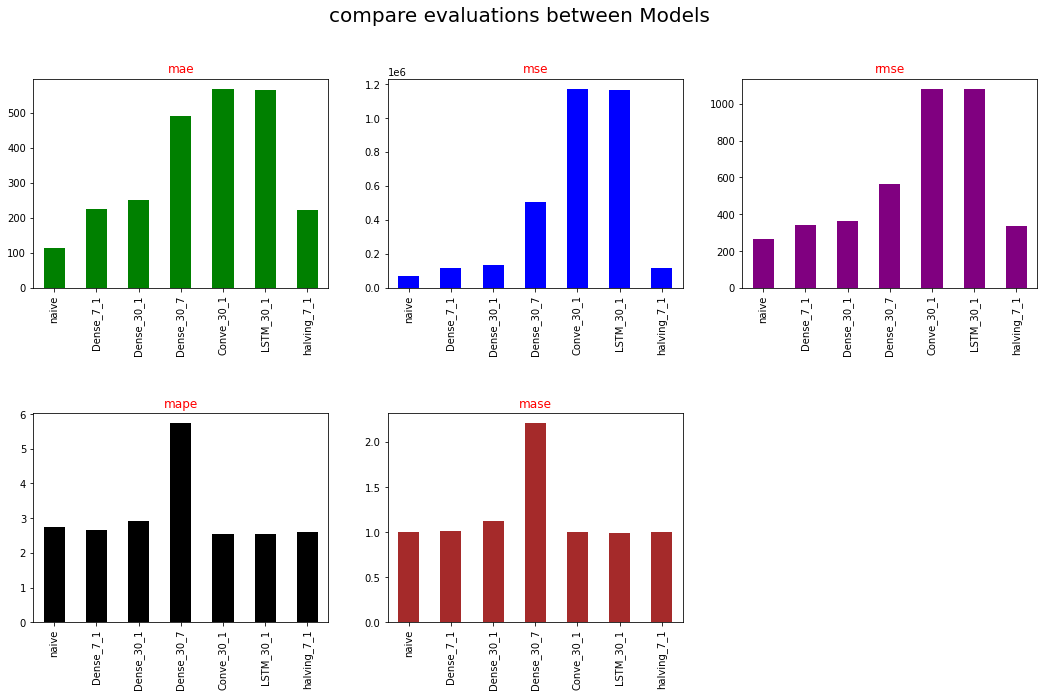

In [134]:
models_results = pd.DataFrame({"naive": base_model_evaluation ,
                               "Dense_7_1": model1_evaluation ,
                               "Dense_30_1":model2_evaluation ,
                               "Dense_30_7": model3_evaluation ,
                               "Conve_30_1": model4_evaluation,
                               "LSTM_30_1":model5_evaluation,
                               "halving_7_1":model6_evaluation})

plt.figure(figsize = [18 , 10])
plt.subplots_adjust(hspace = 0.6)
plt.subplot(2 , 3 , 1)
plt.title("mae" , fontsize = 12 , c = "red")
models_results.transpose()["mae"].plot.bar(color = "green")
plt.subplot(2 , 3 , 2)
plt.title("mse" , fontsize = 12 , c = "red")
models_results.transpose()["mse"].plot.bar(color = "blue")
plt.subplot(2 , 3 , 3)
plt.title("rmse" , fontsize = 12 , c = "red")
models_results.transpose()["rmse"].plot.bar(color = "purple")
plt.subplot(2 , 3 , 4)
plt.title("mape" , fontsize = 12 , c = "red")
models_results.transpose()["mape"].plot.bar(color = "black")
plt.subplot(2 , 3 , 5)
plt.title("mase" , fontsize = 12 , c = "red")
models_results.transpose()["mase"].plot.bar(color = "brown")
plt.suptitle("compare evaluations between Models", fontsize = 20)
plt.show()

In [135]:
times_halving =ts["time"].to_numpy()
times_halving[:10]

array(['2013-10-08T00:00:00.000000000', '2013-10-09T00:00:00.000000000',
       '2013-10-10T00:00:00.000000000', '2013-10-11T00:00:00.000000000',
       '2013-10-12T00:00:00.000000000', '2013-10-13T00:00:00.000000000',
       '2013-10-14T00:00:00.000000000', '2013-10-15T00:00:00.000000000',
       '2013-10-16T00:00:00.000000000', '2013-10-17T00:00:00.000000000'],
      dtype='datetime64[ns]')

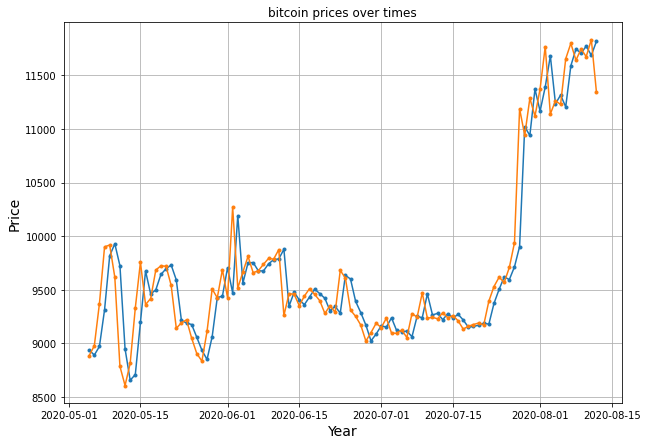

In [136]:
plt.figure(figsize = (10 , 7))
plot_btc(times_halving[2001:] , model6_predicts , start = 400)
plot_btc(times_halving[2001:] , test_labels , start = 400)

In [137]:
ts

,time,value,reward,price1,price2,price3,price4,price5,price6,price7
0,2013-10-08,123.033000,25.00,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000,123.654990
1,2013-10-09,124.049000,25.00,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000
2,2013-10-10,125.961160,25.00,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830
3,2013-10-11,125.279660,25.00,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660
4,2013-10-12,125.927500,25.00,125.279660,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660
...,...,...,...,...,...,...,...,...,...,...
2496,2020-08-08,11639.935410,6.25,11796.817365,11653.407586,11228.026324,11261.806332,11139.098380,11766.748297,11373.317257
2497,2020-08-09,11744.912076,6.25,11639.935410,11796.817365,11653.407586,11228.026324,11261.806332,11139.098380,11766.748297
2498,2020-08-10,11673.123238,6.25,11744.912076,11639.935410,11796.817365,11653.407586,11228.026324,11261.806332,11139.098380
2499,2020-08-11,11832.227308,6.25,11673.123238,11744.912076,11639.935410,11796.817365,11653.407586,11228.026324,11261.806332


In [138]:
ts[ts.index == 0][["price1" ,"price2" ,"price3" ,"price4" ,"price5" ,"price6" ,"price7"]].to_numpy()

array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
        123.65499]])

In [139]:
nbeats_windows = []
for i in range(len(ts)):
  window = ts[ts.index == i][["price1" ,"price2" ,"price3" ,"price4" ,"price5" ,"price6" ,"price7"]].to_numpy()
  nbeats_windows.append(window)

In [140]:
nbeats_windows = np.squeeze(nbeats_windows)

In [141]:
nbeats_horizons = ts["value"].to_numpy()
nbeats_horizons[:5]

array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ])

In [142]:
train_nbeats_windows = nbeats_windows[:2001]
test_nbeats_windows = nbeats_windows[2001:]
train_nbeats_horizons = nbeats_horizons[:2001]
test_nbeats_horizons = nbeats_horizons[2001:]

In [143]:
train_nbeats_windows = tf.data.Dataset.from_tensor_slices(train_nbeats_windows).batch(1024).prefetch(tf.data.AUTOTUNE)
train_nbeats_horizons = tf.data.Dataset.from_tensor_slices(train_nbeats_horizons).batch(1024).prefetch(tf.data.AUTOTUNE)

In [144]:
train_nbeats = tf.data.Dataset.zip((train_nbeats_windows , train_nbeats_horizons))

In [145]:
test_nbeats_windows = tf.data.Dataset.from_tensor_slices(test_nbeats_windows).batch(1024).prefetch(tf.data.AUTOTUNE)
test_nbeats_horizons = tf.data.Dataset.from_tensor_slices(test_nbeats_horizons).batch(1024).prefetch(tf.data.AUTOTUNE)
test_nbeats = tf.data.Dataset.zip((test_nbeats_windows , test_nbeats_horizons))

In [146]:
train_nbeats , test_nbeats

(<ZipDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <ZipDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [147]:
N_EPOCH = 5000
BATCH_SIZE = 1024
N_STACKS = 30
N_LAYERS = 4
N_NEURONS = 512

WINDOW_SIZE = 7
HORIZON_SIZE = 1

INPUT_SIZE = WINDOW_SIZE
THETA_SIZE = WINDOW_SIZE + HORIZON_SIZE

In [148]:
class NBeatBlock(tf.keras.layers.Layer):
  ''' this is a simple block of nbeat'''
  def __init__(self , n_neurons:int , n_layers:int , horizon:int , input_size:int , theta_size:int , **kwargs):
    super().__init__(**kwargs)
    self.n_neurons = n_neurons
    self.n_layers = n_layers
    self.horizon = horizon
    self.input_size = input_size
    self.theta_size = theta_size

    self.hidden_layers = [tf.keras.layers.Dense(self.input_size , activation = "relu" , name = f"dense_layer_{i}") for i in range(self.n_layers)]
    self.theta_layer = tf.keras.layers.Dense(self.theta_size , activation = "relu" , name = "dense_layer_theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden_layers:
      x = layer(x)
    theta = self.theta_layer(x)

    backcast , forecast = theta[: , :self.input_size] , theta[: , -self.horizon:]
    return backcast , forecast

In [149]:
input_layer = tf.keras.layers.Input(shape = (INPUT_SIZE) , name = "input_layer_model_7")
nbeat_block = NBeatBlock(n_neurons= N_NEURONS , n_layers = N_LAYERS , horizon = HORIZON_SIZE,
                         input_size = INPUT_SIZE , theta_size = THETA_SIZE , name = "block_0")
backcast , forecast = nbeat_block(input_layer)
residuals = tf.keras.layers.subtract([input_layer , backcast] , name = "subtract_0")

for i in range(N_STACKS - 1):
  nbeat_block = NBeatBlock(n_neurons= N_NEURONS , n_layers = N_LAYERS , horizon = HORIZON_SIZE,
                         input_size = INPUT_SIZE , theta_size = THETA_SIZE , name = f"block_{i+1}")
  
  backcast , block_forecast = nbeat_block(residuals)
  residuals = tf.keras.layers.subtract([residuals , backcast] , name = f"subtract_{i+1}")
  forecast = tf.keras.layers.add([forecast , block_forecast] , name = f"forcast_layer_{i+1}")

model7 = tf.keras.models.Model(inputs = input_layer , outputs = forecast , name = "model_7")
model7.compile(loss = "mae" , optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001) , metrics = ["mae" , "mse"])
history7 = model7.fit(train_nbeats , epochs = N_EPOCH , validation_data = test_nbeats , callbacks = [tf.keras.callbacks.EarlyStopping(monitor = "val_loss" , patience=200 , verbose = 0 , restore_best_weights=True) , tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss" , patience=100)])

Epoch 1/5000
2/2 [==============================] - 8s 1s/step - loss: 201.4509 - mae: 201.4509 - mse: 206203.3750 - val_loss: 551.9618 - val_mae: 551.9618 - val_mse: 472889.2500 - lr: 1.0000e-04
Epoch 2/5000
2/2 [==============================] - 0s 100ms/step - loss: 181.3753 - mae: 181.3753 - mse: 181401.4375 - val_loss: 485.6772 - val_mae: 485.6772 - val_mse: 384365.6562 - lr: 1.0000e-04
Epoch 3/5000
2/2 [==============================] - 0s 100ms/step - loss: 163.9186 - mae: 163.9186 - mse: 161061.6250 - val_loss: 428.5339 - val_mae: 428.5339 - val_mse: 316595.5938 - lr: 1.0000e-04
Epoch 4/5000
2/2 [==============================] - 0s 97ms/step - loss: 149.9479 - mae: 149.9479 - mse: 145276.4219 - val_loss: 386.3346 - val_mae: 386.3346 - val_mse: 270951.9688 - lr: 1.0000e-04
Epoch 5/5000
2/2 [==============================] - 0s 102ms/step - loss: 140.3847 - mae: 140.3847 - mse: 133951.5156 - val_loss: 358.4026 - val_mae: 358.4026 - val_mse: 245327.9375 - lr: 1.0000e-04
Epoch 6/5

In [150]:
tf.keras.models.save_model(model7 , "/content/model_experiments/model_7")

In [151]:
model7_evaluate = model7.evaluate(test_nbeats)
model7_evaluate

1/1 [==============================] - 0s 14ms/step - loss: 225.9250 - mae: 225.9250 - mse: 114974.6250


[225.9250030517578, 225.9250030517578, 114974.625]

In [152]:
model7_predicts = model7.predict(test_nbeats_windows)
model7_predicts[:10]

1/1 [==============================] - 1s 1s/step


array([[4095.768 ],
       [4106.6875],
       [4148.69  ],
       [4833.179 ],
       [5141.5435],
       [4984.6855],
       [5147.7876],
       [5048.265 ],
       [5183.186 ],
       [5284.871 ]], dtype=float32)

In [153]:
model7_evaluation = calculate_btc_evaluation_result( nbeats_horizons[2001:] , np.squeeze(model7_predicts))
model7_evaluation

{'mae': 225.925,
 'mse': 114974.625,
 'rmse': 339.07907,
 'mape': 2.668553,
 'mase': 1.0159569}

In [154]:
base_model_evaluation

{'mae': 114.85984,
 'mse': 71173.1,
 'rmse': 266.78287,
 'mape': 2.7602856,
 'mase': 0.9996074}

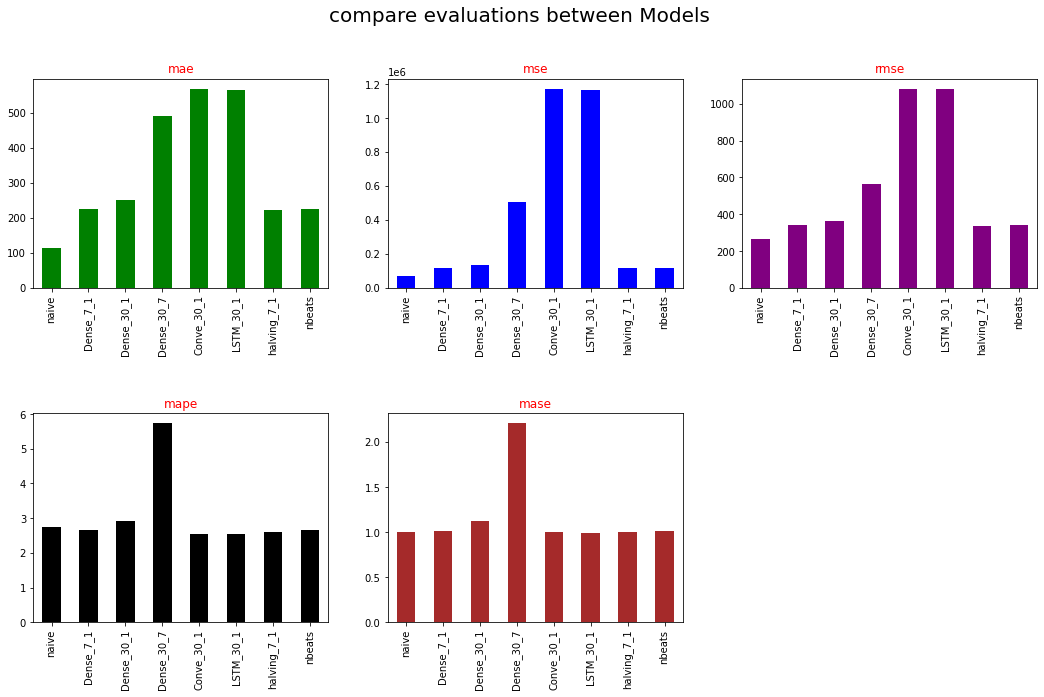

In [155]:
models_results = pd.DataFrame({"naive": base_model_evaluation ,
                               "Dense_7_1": model1_evaluation ,
                               "Dense_30_1":model2_evaluation ,
                               "Dense_30_7": model3_evaluation ,
                               "Conve_30_1": model4_evaluation,
                               "LSTM_30_1":model5_evaluation,
                               "halving_7_1":model6_evaluation,
                               "nbeats":model7_evaluation})

plt.figure(figsize = [18 , 10])
plt.subplots_adjust(hspace = 0.6)
plt.subplot(2 , 3 , 1)
plt.title("mae" , fontsize = 12 , c = "red")
models_results.transpose()["mae"].plot.bar(color = "green")
plt.subplot(2 , 3 , 2)
plt.title("mse" , fontsize = 12 , c = "red")
models_results.transpose()["mse"].plot.bar(color = "blue")
plt.subplot(2 , 3 , 3)
plt.title("rmse" , fontsize = 12 , c = "red")
models_results.transpose()["rmse"].plot.bar(color = "purple")
plt.subplot(2 , 3 , 4)
plt.title("mape" , fontsize = 12 , c = "red")
models_results.transpose()["mape"].plot.bar(color = "black")
plt.subplot(2 , 3 , 5)
plt.title("mase" , fontsize = 12 , c = "red")
models_results.transpose()["mase"].plot.bar(color = "brown")
plt.suptitle("compare evaluations between Models", fontsize = 20)
plt.show()

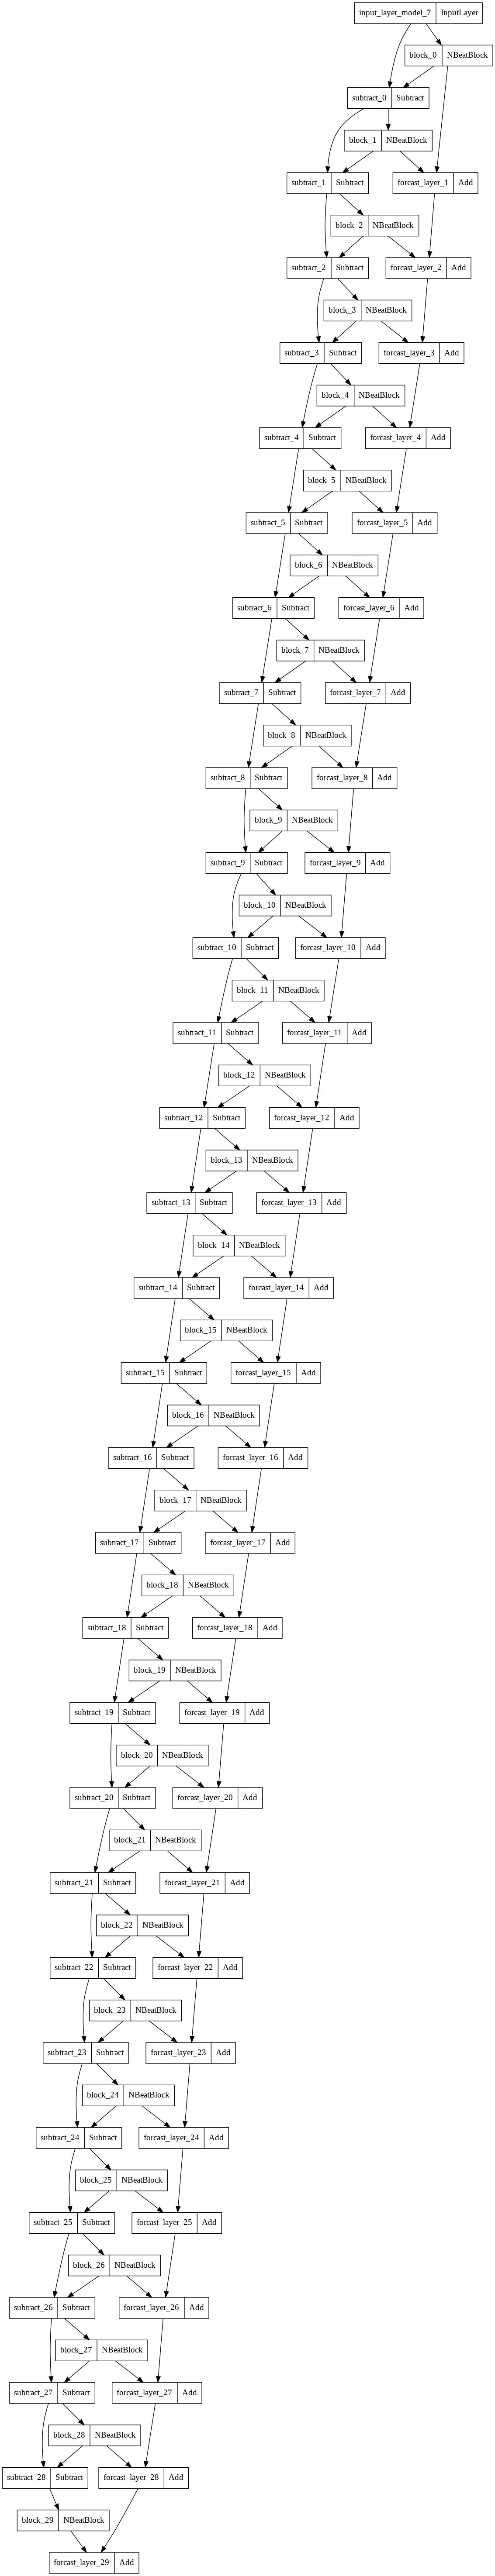

In [156]:
tf.keras.utils.plot_model(model7)

In [157]:
ensemble_models = []

def train_ensemble_models(train_data = train_nbeats , test_data = test_nbeats , num_iter = 10 , loss_funcs = ["mae", "mse" , "mape"]):
  ''' this method create a model and train it number of iteration in 3 different loss functions as ensemble learning'''
  for i in range(num_iter):
    for loss in loss_funcs:

      model = tf.keras.Sequential([
          tf.keras.layers.Dense(128 , activation = "relu"),
          tf.keras.layers.Dense(128 , activation = "relu" ),
          tf.keras.layers.Dense(HORIZON_SIZE , activation = "linear")
      ] , name = f"model_ensemble_{i}_with_loss_{loss}")

      model.compile(loss = loss , optimizer = tf.keras.optimizers.Adam(lr = 0.0001) , metrics = ["mae" , "mse"])

      model.fit(train_data , epochs = 1000 , validation_data = test_data ,verbose = 0, callbacks = [tf.keras.callbacks.EarlyStopping(monitor = "val_loss" , patience = 200 , restore_best_weights = True) , tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss" , patience = 100 , verbose = 1)])

      ensemble_models.append(model)
  return ensemble_models


In [158]:
models = train_ensemble_models()

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)



Epoch 881: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.

Epoch 981: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.

Epoch 753: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.

Epoch 853: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.

Epoch 942: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.

Epoch 793: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.

Epoch 893: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.

Epoch 953: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.

Epoch 549: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.

Epoch 649: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.

Epoch 739: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.

Epoch 839: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.

Epoch 400: ReduceLROnPlateau reducing learning rate

In [159]:
ensemble_predicts = []
def predict_with_ensemble_models(ensemble_models  , test_data = test_nbeats):
  models = ensemble_models
  for model in models:
    preds = model.predict(test_data)
    ensemble_predicts.append(np.squeeze(preds , axis =1))
  return ensemble_predicts

In [160]:
ensemble_preds = predict_with_ensemble_models(models)

1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 32ms/step


In [161]:
preds_ensemble_mean = np.mean(ensemble_predicts , axis = 0)
preds_ensemble_median = np.median(ensemble_predicts , axis = 0)

In [162]:
ensemble_evaluation_mean = calculate_btc_evaluation_result( nbeats_horizons[2001:], preds_ensemble_mean)
ensemble_evaluation_mean

{'mae': 224.50615,
 'mse': 115668.375,
 'rmse': 340.10052,
 'mape': 2.6234684,
 'mase': 1.0095766}

In [163]:
ensemble_evaluation_median = calculate_btc_evaluation_result(nbeats_horizons[2001:] , preds_ensemble_median)
ensemble_evaluation_median

{'mae': 224.03181,
 'mse': 115442.76,
 'rmse': 339.76868,
 'mape': 2.6195061,
 'mase': 1.0074435}

In [164]:
base_model_evaluation

{'mae': 114.85984,
 'mse': 71173.1,
 'rmse': 266.78287,
 'mape': 2.7602856,
 'mase': 0.9996074}

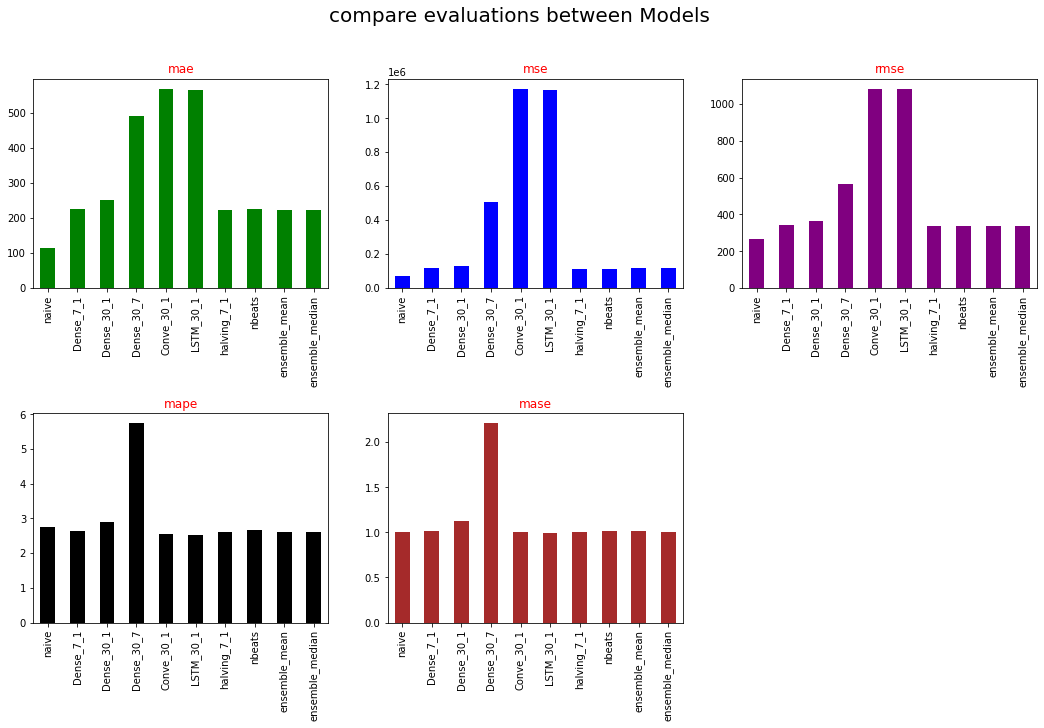

In [165]:
models_results = pd.DataFrame({"naive": base_model_evaluation ,
                               "Dense_7_1": model1_evaluation ,
                               "Dense_30_1":model2_evaluation ,
                               "Dense_30_7": model3_evaluation ,
                               "Conve_30_1": model4_evaluation,
                               "LSTM_30_1":model5_evaluation,
                               "halving_7_1":model6_evaluation,
                               "nbeats":model7_evaluation,
                               "ensemble_mean":ensemble_evaluation_mean,
                               "ensemble_median":ensemble_evaluation_median})

plt.figure(figsize = [18 , 10])
plt.subplots_adjust(hspace = 0.6)
plt.subplot(2 , 3 , 1)
plt.title("mae" , fontsize = 12 , c = "red")
models_results.transpose()["mae"].plot.bar(color = "green")
plt.subplot(2 , 3 , 2)
plt.title("mse" , fontsize = 12 , c = "red")
models_results.transpose()["mse"].plot.bar(color = "blue")
plt.subplot(2 , 3 , 3)
plt.title("rmse" , fontsize = 12 , c = "red")
models_results.transpose()["rmse"].plot.bar(color = "purple")
plt.subplot(2 , 3 , 4)
plt.title("mape" , fontsize = 12 , c = "red")
models_results.transpose()["mape"].plot.bar(color = "black")
plt.subplot(2 , 3 , 5)
plt.title("mase" , fontsize = 12 , c = "red")
models_results.transpose()["mase"].plot.bar(color = "brown")
plt.suptitle("compare evaluations between Models", fontsize = 20)
plt.show()

In [166]:
def get_lower_upper_preds(predicts):
  ''' find lower and upper intervals of an predictions'''

  std = tf.math.reduce_std(predicts , axis = 0)

  interval = 1.96 * std

  mean = tf.math.reduce_mean(predicts , axis = 0)

  upper = mean + interval
  lower = mean - interval

  return upper  , lower , mean

In [167]:
uppers , lowers , mean = get_lower_upper_preds(ensemble_preds)

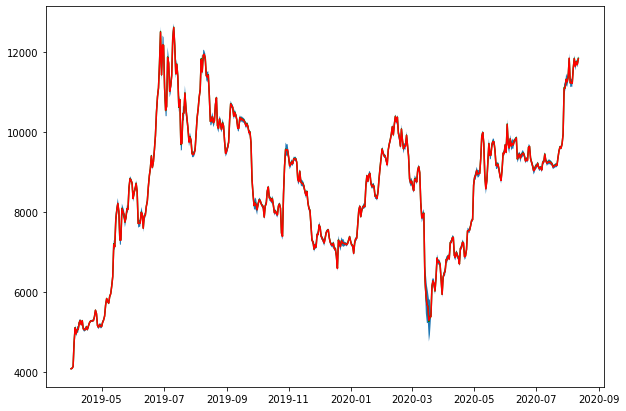

In [168]:
median = np.median(ensemble_preds , axis = 0)

plt.figure(figsize = (10 , 7))
plt.plot(ts['time'][2001:] , median, "g" , label = "median")
plt.plot(ts['time'][2001:] , mean , "r" , label = "mean")
plt.fill_between(ts['time'][2001:] , lowers , uppers)


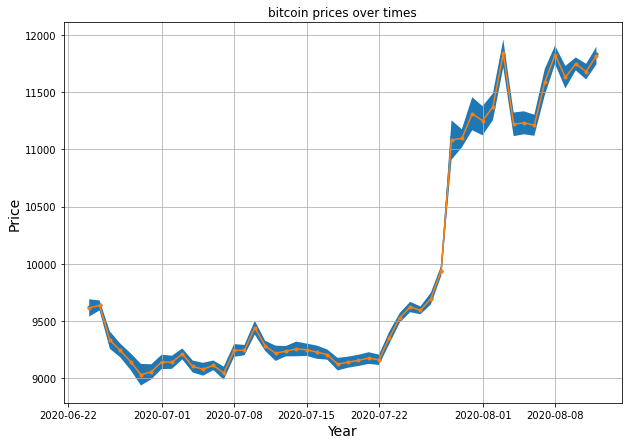

In [169]:
plt.figure(figsize = (10 , 7))
plot_btc(ts['time'][2451:] , median[450:])
plot_btc(ts['time'][2451:] , mean[450:])
plt.fill_between(ts['time'][2451:] , lowers[450:] , uppers[450:])

> **from hear to the next, we are going to build bitpredict a live**
*   first we create our all data
*   second we build our model
*   third we train the model with all our data
*   in the final we create a method to build a good predicter for the time series problems


In [170]:
btc_full = btc.drop(["Currency" , "24h Open (USD)" , "24h High (USD)" , "24h Low (USD)"] , axis = 1)

In [171]:
btc_full.rename(columns = { "Closing Price (USD)":"price0" } , inplace = True)
btc_full.head()

,price0
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [172]:
btc_full[["price1" , "price2" , "price3" , "price4" , "price5" , "price6" , "price7"]] = 0
for i in range(7):
  btc_full[f"price{i+1}"] = btc_full[f"price{i}"].shift(1 , axis = 0)

In [173]:
btc_full = btc_full.dropna()

In [174]:
btc_full.head(10)

,price0,price1,price2,price3,price4,price5,price6,price7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866
2013-10-13,126.38333,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533
2013-10-14,135.24199,126.38333,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500
2013-10-15,133.20333,135.24199,126.38333,125.92750,125.27966,125.96116,124.04900,123.03300
2013-10-16,142.76333,133.20333,135.24199,126.38333,125.92750,125.27966,125.96116,124.04900


In [175]:
full_times = btc_full.index.to_numpy()
full_horizons = btc_full["price0"].to_numpy()
full_windows = btc_full[["price7" , "price6" , "price5" , "price4" , "price3" , "price2" , "price1"]].to_numpy()

In [176]:
full_horizons[:5]

array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ])

In [177]:
full_windows[-5:]

array([[56583.84987917, 57107.12067189, 58788.20967893, 58102.19142623,
        55715.54665129, 56573.5554719 , 52147.82118698],
       [57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 ],
       [58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
        52147.82118698, 49764.1320816 , 50032.69313676],
       [58102.19142623, 55715.54665129, 56573.5554719 , 52147.82118698,
        49764.1320816 , 50032.69313676, 47885.62525472],
       [55715.54665129, 56573.5554719 , 52147.82118698, 49764.1320816 ,
        50032.69313676, 47885.62525472, 45604.61575361]])

In [178]:
full_windows_data = tf.data.Dataset.from_tensor_slices(tf.expand_dims(full_windows , axis = 0))
full_horizons_data = tf.data.Dataset.from_tensor_slices(tf.expand_dims(full_horizons , axis = 0))
full_data = tf.data.Dataset.zip((full_windows_data , full_horizons_data)).batch(1024).prefetch(tf.data.AUTOTUNE)
full_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 2780, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None, 2780), dtype=tf.float64, name=None))>

In [179]:
model9 = tf.keras.Sequential([
    tf.keras.layers.Dense(128 , activation = "relu"),
    tf.keras.layers.Dense(1 , activation = "relu")
] , name = "model9")

model9.compile(loss = "mae" , optimizer = tf.keras.optimizers.Adam(lr = 0.0001) , metrics = ["mae" , "mse"])

history9 = model9.fit(full_data , epochs = 1000 , verbose = 1)

Epoch 1/1000


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 423ms/step - loss: 5309.3530 - mae: 5309.3530 - mse: 106220192.0000
Epoch 2/1000
1/1 [==============================] - 0s 8ms/step - loss: 5265.8311 - mae: 5265.8311 - mse: 104490776.0000
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 5222.2920 - mae: 5222.2920 - mse: 102775616.0000
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 5178.7300 - mae: 5178.7300 - mse: 101074016.0000
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 5135.1348 - mae: 5135.1348 - mse: 99385040.0000
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 5091.5259 - mae: 5091.5259 - mse: 97709936.0000
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 5047.8970 - mae: 5047.8970 - mse: 96048064.0000
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 5004.2549 - mae: 5004.2549 - mse: 94399832.0000
Epoch 9/1000
1/1 [============================

In [180]:
tf.squeeze(model9.predict(tf.expand_dims([56583.84987917, 57107.12067189, 58788.20967893, 58102.19142623,
        55715.54665129, 56573.5554719 , 52147.82118698] , axis = 0))).numpy()

1/1 [==============================] - 0s 68ms/step


54315.035

In [181]:
def predict_without_training_model(values , model , future_lenght , window_size):
  ''' predict values for the future using neural network without training each time '''

  last_window = values[-window_size:]
  predicts = []
  
  for _ in range(future_lenght):
    predict = tf.squeeze(model.predict(tf.expand_dims(last_window , axis = 0) , verbose = 0)).numpy()
    predicts.append(predict)
    values = np.append(values , predict)
    last_window = values[-window_size:]
  
  return predicts


In [182]:
model9_predicts = predict_without_training_model(full_horizons , model9 , 7, 7)
model9_predicts

[43552.477, 42950.777, 42564.504, 42102.293, 41782.25, 41666.58, 41753.73]

In [183]:
def predict_with_training_model(values ,windows, model , future_lenght , window_size):
  ''' predict values for the future using neural network without training each time 
      here values are full_horizons
      here windows are full_windows
  '''

  last_window = values[-window_size:]
  predicts = []
  
  for _ in range(future_lenght):
    predict = tf.squeeze(model.predict(tf.expand_dims(last_window , axis = 0) , verbose = 0)).numpy()
    predicts.append(predict)
    values = np.append(values , predict)
    windows = np.append(windows , np.expand_dims(last_window , axis = 0) , axis = 0)
    model = train_model(model , values , windows)
    last_window = values[-window_size:]
    print(f"{last_window}\n")
    
  
  return predicts


def train_model(model , horizons , windows):
  ''' create autotune data and train model with this new data'''
  full_windows_data = tf.data.Dataset.from_tensor_slices(tf.expand_dims(windows , axis = 0))
  full_horizons_data = tf.data.Dataset.from_tensor_slices(tf.expand_dims(horizons , axis = 0))
  full_data = tf.data.Dataset.zip((full_windows_data , full_horizons_data)).batch(1024).prefetch(tf.data.AUTOTUNE)

  model.compile(loss = "mae" , optimizer = tf.keras.optimizers.Adam(lr = 0.0001) , metrics = ["mae" , "mse"])
  model.fit(full_data , epochs = 100 , verbose = 0)

  return model
  

In [184]:
full_windows[2779] , full_horizons[2779]

(array([55715.54665129, 56573.5554719 , 52147.82118698, 49764.1320816 ,
        50032.69313676, 47885.62525472, 45604.61575361]), 43144.4712908603)

In [185]:
model9_training_predicts = predict_with_training_model(full_horizons , full_windows ,model9 , 7 , 7)

[52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 43552.4765625 ]



[49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 43552.4765625  42810.6875    ]



[50032.69313676 47885.62525472 45604.61575361 43144.47129086
 43552.4765625  42810.6875     42531.44921875]



[47885.62525472 45604.61575361 43144.47129086 43552.4765625
 42810.6875     42531.44921875 42171.4921875 ]



[45604.61575361 43144.47129086 43552.4765625  42810.6875
 42531.44921875 42171.4921875  41954.1484375 ]



[43144.47129086 43552.4765625  42810.6875     42531.44921875
 42171.4921875  41954.1484375  41813.65625   ]

[43552.4765625  42810.6875     42531.44921875 42171.4921875
 41954.1484375  41813.65625    41871.7890625 ]



In [186]:
print(f"model9 predicts without training ====> {model9_predicts}\n")
print(f"model9 predicts with training ====> {model9_training_predicts}\n")

model9 predicts without training ====> [43552.477, 42950.777, 42564.504, 42102.293, 41782.25, 41666.58, 41753.73]

model9 predicts with training ====> [43552.477, 42810.688, 42531.45, 42171.492, 41954.15, 41813.656, 41871.79]

